In [1]:
import urllib.request as req
import requests
import time
from bs4 import BeautifulSoup
import pandas as pd
from obspy import UTCDateTime
from glob import glob
import numpy as np
import datetime

In [2]:
### "Cookie"需要每次更換
url_header={"sec-ch-ua-mobile": "?0",
"sec-ch-ua-platform": "Linux",
"sec-fetch-dest": "empty",
"sec-fetch-mode": "no-ct.csvors",
"sec-fetch-site": "same-origin",
"user-agent":"Mozilla/5.0 (X11; Fedora; Linux x86_64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.45 Safari/537.36"
           }

In [3]:
def get_url (time):
        
    url=f"https://e-service.cwb.gov.tw/HistoryDataQuery/MonthDataController.do?command=viewMain"+\
        f"&station=C0AC70&stname=%25E4%25BF%25A1%25E7%25BE%25A9&datepicker={time}"
         
    return url
    
 

In [4]:
def get_rain_data(time1):
    """
    tr.select('td'): 選tr底下的td子節點標籤
    """
    csv_name=f"{time1}.csv"
    url=get_url(time=time1)
    reqst=requests.get(url,headers=url_header)
    soup = BeautifulSoup(reqst.text,'html.parser') # 轉成網頁格式
    xlist=[['date','precp']]
    for tr in soup.find_all('tr'):
        try:
            xlist.append([f"{time1}-{tr.select('td')[0].string.zfill(2)}",tr.select('td')[21].string.split()[0]])
        except:
            continue
    df=pd.DataFrame(xlist)
    df.to_csv(csv_name, sep=',',mode='w',header=None,index=None)
    

In [5]:
### MAIN
for i in range(11,13):
    time1=f"2021-{str(i).zfill(2)}"
    print(time1)
    get_rain_data(time1)
    time.sleep(1)

2021-11
2021-12


In [6]:
### 多個CSV 合併
files = glob('*.csv')
df = pd.concat(
    (pd.read_csv(file, 
                 usecols=['date','precp'], 
                 dtype={ 'date': 'object' , 'precp':'object'}) for file in files), 
    ignore_index=True)

In [7]:
ts=df['date'] = pd.to_datetime(df['date'])
df['precp']=pd.to_numeric(df['precp'], errors='coerce')
df=df.sort_values(by='date')
df.to_csv('rainfall_2021.csv', sep=',',mode='w',header=None,index=None)

In [14]:
df=pd.read_csv('rainfall_2021.csv', sep=',',names=['date','precp'])

In [15]:
ts=df['date'] = pd.to_datetime(df['date'])
df=df.sort_values(by='date')

In [24]:
df=df[(df.date>datetime.datetime(2021,8,31)) & (df.date<datetime.datetime(2021,12,6))]

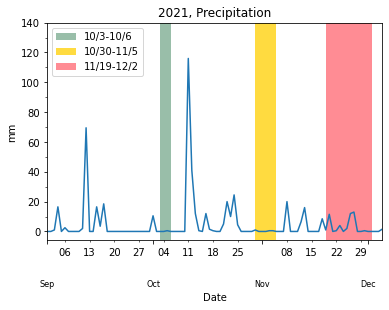

In [40]:
import matplotlib.dates as dates
ax = df.plot(x='date',y='precp',
             title="2021, Precipitation",xlabel="Date",ylabel="mm",
             legend=False,figsize=(6,4))
#xtick = pd.date_range(start=ts.min(), end=ts.max(), freq='w' )

v1=ax.axvspan(datetime.datetime(2021,10,3), datetime.datetime(2021,10,6), facecolor='#77A88D',alpha=0.75,label='10/3-10/6')
v2=ax.axvspan(datetime.datetime(2021,10,30), datetime.datetime(2021,11,5), facecolor='#FFD000',alpha=0.75,label='10/30-11/5')
v3=ax.axvspan(datetime.datetime(2021,11,19), datetime.datetime(2021,12,2), facecolor='#FF6670',alpha=0.75,label='11/19-12/2')


ax.tick_params(axis = 'x', which = 'minor', labelsize =10,pad=5)
## 0 是禮拜一
ax.xaxis.set_minor_locator(dates.WeekdayLocator(byweekday=(0),interval=1))
ax.xaxis.set_minor_formatter(dates.DateFormatter('%d'))

ax.tick_params(axis = 'x', which = 'major', labelsize=8,pad=5)
ax.xaxis.set_major_locator(dates.MonthLocator())
ax.xaxis.set_major_formatter(dates.DateFormatter('\n\n\n%b'))
ax.set_yticks( [y for y in np.arange(0,150,10)], minor=True )
ax.legend(handles=[v1,v2,v3])
fig = ax.get_figure()
#fig.tight_layout()  

fig.savefig('rainfall_2021_09_11.png',format='png',dpi=300,bbox_inches='tight',pad_inches = 0.05)

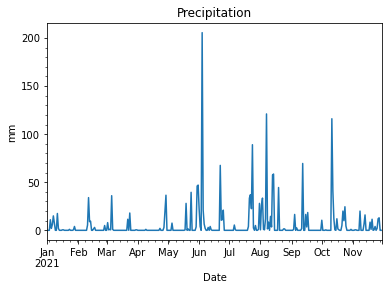

In [76]:
ax = df.plot(x='date',y='precp',
             title="Precipitation",xlabel="Date",ylabel="mm",
             legend=False)
xtick = pd.date_range(start=ts.min(), end=ts.max(), freq='W' )
ax.set_xticks( xtick, minor=True )
ax.set_yticks( [y for y in np.arange(0,200,10)], minor=True )
fig = ax.get_figure()
fig.savefig('rainfall_2021.png',format='png',dpi=300)

In [58]:
ts.min()

Timestamp('2021-01-01 00:00:00')